## <h1><center>Machine Learning Project</center></h1>

### <center> Class of 2019/2020 </center> 



   <center> Maren
    <br>
    Catarina Palha - M20190156
    <br>
    Mafalda 
    <br>
    Pedro </center>


In [43]:
#FILL WITH YOUR NAME AND NUMBER PLZ, THE LAST ONE DELETES THIS CELL

### TODO - TO BE TRNSFORMED INTO INDEX

* [1. Datasets to analyse](#firstAnalyse)
    * [1.1. Drop all nulls](#tech1)
    * [1.2. Replace all the nulls](#tech2)
    * [1.2. Replace birthday_year column and drop the tents one](#tech3)
* [2. Rank features](#selection)

## 1. Introduction

On January 1st, 2020, an epidemy was originated in Albuquerque, in New Mexico state, and spread on the
following days to Santa Fe and Taos. It is estimated that the epidemy has already affected more than 1000
people at the end of February, with a mortality rate of more than 50%.

***GOAL: What are the people more likely to survive to the boolean pandemic?***


## 2. About the data

`Patient_ID` The unique identifier of the patient<br>
`Family_Case_ID` The family identification<br>
`Severity`The severity of the disease, where 1 is the lowest and 3 the highest severity<br>
`Name`The name of the patient<br>
`Birthday_year`The year of birthday of the patient<br>
`Parents_Siblings_Infected` The number of parents and/or siblings infected<br>
`Partner_Children_Infected`The number of partner and/or children infected<br>
`Medical_Expenses_Family`The medical expenses associated to try to contain the epidemy on the family<br>
`Medical_Tent` The medical tent where the patient is / was lodged<br>
`City` The original city of the patient<br>
`Deceased` Flag if the patient deceased or not with the virus (0 = No, 1 = Yes)<br>

In [44]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### 1. First Look at the data 

!!! WRITE HERE THE FIRST ANALYSES !!! 

In [45]:
#Importing the data
df = pd.read_csv('train.csv')
df.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0


In [46]:
df.shape

(900, 11)

In [47]:
df.describe()

,Patient_ID,Family_Case_ID,Severity,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Deceased
count,900.000000,900.000000,900.000000,723.000000,900.000000,900.000000,900.000000,900.000000
mean,450.500000,14305.827778,2.313333,1990.266943,0.380000,0.521111,895.743333,0.614444
std,259.951919,25418.153900,0.834223,14.523335,0.803247,1.098385,1385.829926,0.486997
min,1.000000,345.000000,1.000000,1940.000000,0.000000,0.000000,0.000000,0.000000
25%,225.750000,8203.000000,2.000000,1982.000000,0.000000,0.000000,221.000000,0.000000
50%,450.500000,13593.500000,3.000000,1992.000000,0.000000,0.000000,405.000000,1.000000
75%,675.250000,18906.500000,3.000000,1999.500000,0.000000,1.000000,861.250000,1.000000
max,900.000000,742836.000000,3.000000,2019.000000,6.000000,8.000000,14345.000000,1.000000


In [48]:
def unique(df):
    """To check the unique values of each columns"""
    cols = df.columns
    for name in cols:
        print('Unique values for column' , name , 'are: ' , df[name].unique())
        
#It doesn't seem to exist anything strange
#unique(df)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
Patient_ID                           900 non-null int64
Family_Case_ID                       900 non-null int64
Severity                             900 non-null int64
Name                                 900 non-null object
Birthday_year                        723 non-null float64
Parents or siblings infected         900 non-null int64
Wife/Husband or children infected    900 non-null int64
Medical_Expenses_Family              900 non-null int64
Medical_Tent                         198 non-null object
City                                 898 non-null object
Deceased                             900 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 77.5+ KB


In [50]:
import seaborn as sns

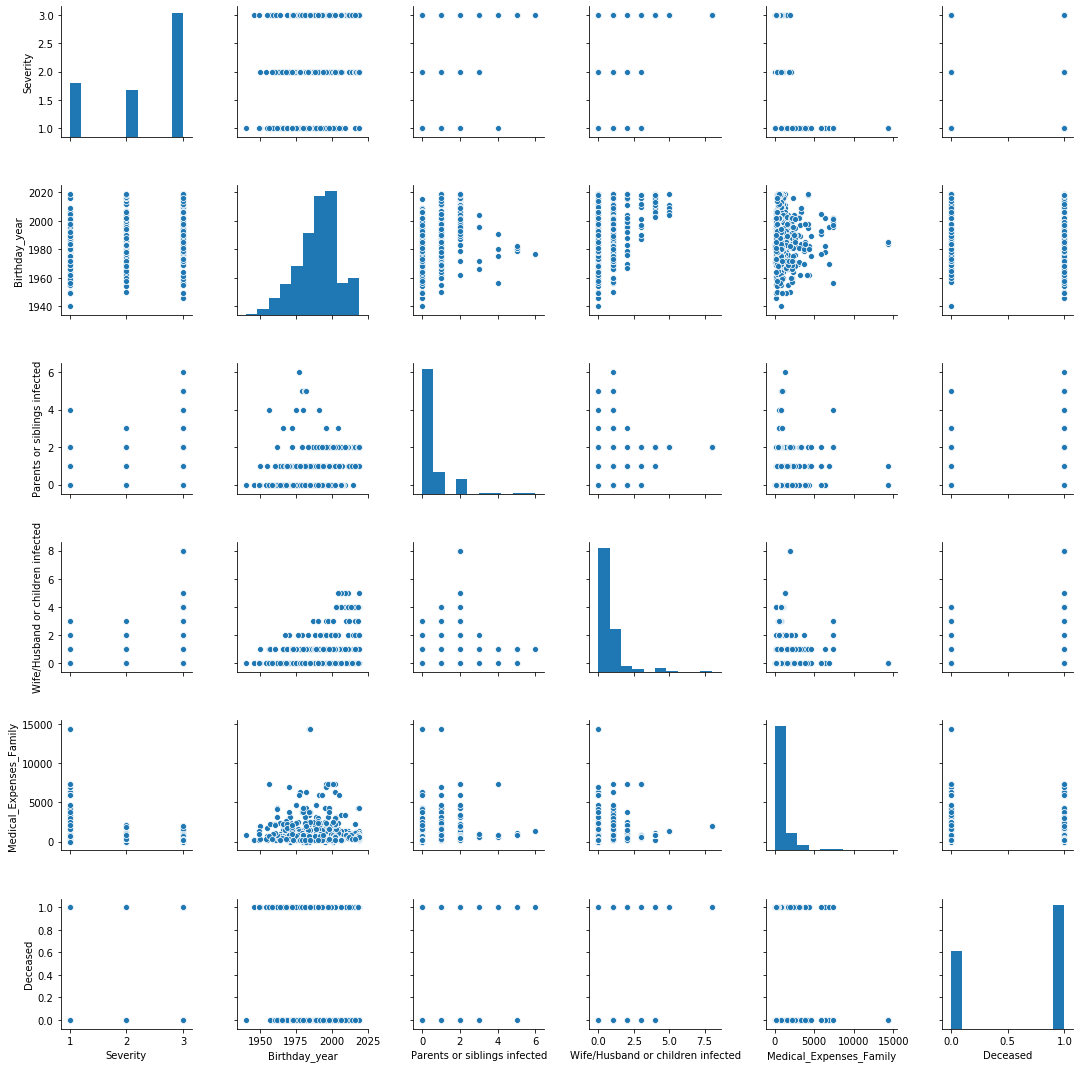

In [51]:
sns.pairplot(df[['Severity', 'Birthday_year', 'Parents or siblings infected', 'Wife/Husband or children infected', 'Medical_Expenses_Family',
                'Medical_Tent', 'City', 'Deceased']])

## 4. Replacing Nulls

There were nulls values in the columns Birthday_year, City and Medical_tent.

- **Birthday_year:** 117 (13% of the data)
- **Medical_Tent:** 702 (78% of the data)
- **City:** 2



In [52]:
df.isnull().sum()

Patient_ID                             0
Family_Case_ID                         0
Severity                               0
Name                                   0
Birthday_year                        177
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
Medical_Tent                         702
City                                   2
Deceased                               0
dtype: int64

#### **City column replacement:**

On the dataframe with the NaN values we can see that the Family_Case_ID is the same for both patients. Therefore, we'll replace the values with the mode.

In [53]:
df_city_nan = df[df['City'].isnull()]
df_city_nan

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
49,50,23155,1,Ms. Elizabeth Teri,1958.0,0,0,2240,B,NaN,0
530,531,23155,1,Ms. Tricia Kathryn,1982.0,0,0,2240,B,NaN,0


In [54]:
df['City'] = df['City'].fillna("Albuquerque")

#### **Medical_Tent column replacement:**

We have 78% of the data missing here, isto is too much therefore we'll drop this column.

We're going to drop on this step the Name column as well.

In [55]:
df = df.drop(['Name', 'Medical_Tent'], axis = 1)

#### **Birthday_year column replacement:**

Although we only have 13% of the data missing in this column we'll drop the rows where this column is null.
Once we're working with epidemic data the cost of using artificial data is too high, so we won't replace this values.


In [56]:
df = df.dropna(axis = 0)

In [57]:
df.isnull().sum()

Patient_ID                           0
Family_Case_ID                       0
Severity                             0
Birthday_year                        0
Parents or siblings infected         0
Wife/Husband or children infected    0
Medical_Expenses_Family              0
City                                 0
Deceased                             0
dtype: int64

In [58]:
df.shape
#We have now 723 rows and 9 columns

(723, 9)

In [59]:
#Reset the index
df = df.reset_index(drop = True)

## 5. Removing Outliers

In [60]:
import matplotlib.pyplot as plt

In [63]:
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased'],
      dtype='object')

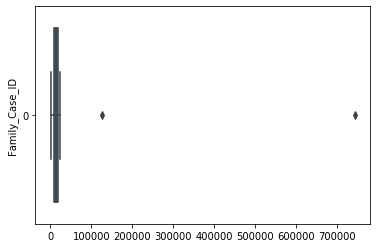

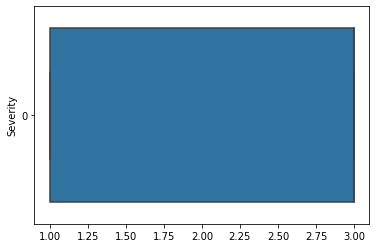

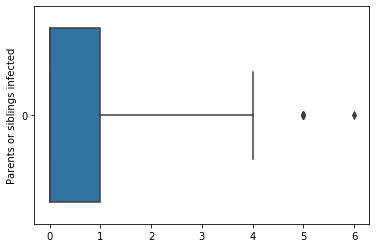

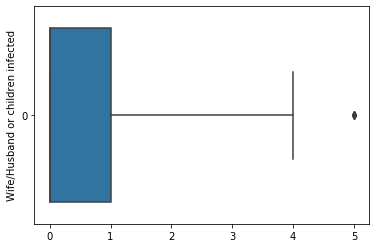

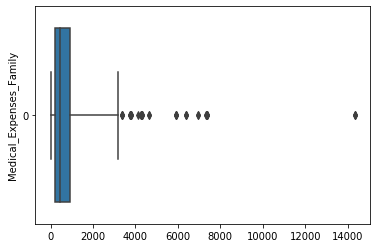

In [64]:
col = ['Family_Case_ID', 'Severity', 'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family']

for col in col:

    sns.boxplot(data = df[col], orient = "h", whis = 3.5)
    plt.ylabel(col)
    plt.show()

We have outliers in: Family_Case_ID, Parents or siblings infected, Wife/Husband or children infected and Medical_Expenses_Family

In [68]:
def zscore(series):
    """Returns the Z score"""
    return (series-series.mean()) / series.std()

In [70]:
out_1 = zscore(df['Family_Case_ID'])
out_2 = zscore(df['Parents or siblings infected'])
out_3 = zscore(df['Wife/Husband or children infected'])
out_4 = zscore(df['Medical_Expenses_Family'])

In [71]:
df_out = pd.DataFrame({'Family_Case_ID': out_1, 'Parents or siblings infected': out_2,
                       'Wife/Husband or children infected': out_3, 'Medical_Expenses_Family': out_4
                      })

In [72]:
df_out.shape #Correct

(723, 4)

With a threshold of 3 we got 67 outliers that's about 7% of the data, too much.

With a threshold of 4 we got 35 outliers that's about 4% of the data, this is fine.

In [73]:
df_out_1 = df_out[(df_out['Family_Case_ID'] > 4) | (df_out['Family_Case_ID'] < -4)]
#df_out_1.shape
#2 outliers with threshold = 3
#2 outliers with threshold = 4
list_1 = list(df_out_1.index)

In [74]:
df_out_2 = df_out[(df_out['Parents or siblings infected'] > 4) | (df_out['Parents or siblings infected'] < -4)]
#df_out_2.shape
#15 outliers with threshold = 3
#10 outliers with threshold = 4
list_2 = list(df_out_2.index)

df_out_3 = df_out[(df_out['Wife/Husband or children infected'] > 4) | (df_out['Wife/Husband or children infected'] < -4)]
#df_out_3.shape
#30 outliers with threshold = 3
#12 outliers with threshold = 4
list_3 = list(df_out_3.index)

In [76]:
df_out_4 = df_out[(df_out['Medical_Expenses_Family'] > 4) | (df_out['Medical_Expenses_Family'] < -4)]
#df_out_4.shape
#20 outliers with threshold = 3
#11 outliers with threshold = 4
list_4 = list(df_out_4.index)

In [77]:
#all outliers together
list_all = list_1 + list_2 + list_3 + list_4

list_to_remove = []

for i in list_all:
  if i not in list_to_remove:
    list_to_remove.append(i)

In [79]:
for i in list_to_remove:
    df = df.drop([df.index[i]])

In [83]:
df = df.reset_index(drop = True)

We lost 4,43% of the data, not bad.

In [86]:
df.shape
#697 rows and 9 columns

(697, 9)

## 6. Feature Selection

In [88]:
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [89]:
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased'],
      dtype='object')

`FEATURES`categorical and numerical<br>

`TARGET` categorical<br>

Once we have categorical and numerical input we need to divide the features in order to decide which numerical and categorical feature contributes the most:

1. Numerical Input/ Categorical Output: ANOVA and Kendall's

2. Categorical Input/ Categorical Output: Chi-Squared and Mutual Information

#### 1. ANOVA - Feature selection for numeric input and categorical output

In [92]:
df_ANOVA_X = df[['Birthday_year', 'Parents or siblings infected', 
              'Wife/Husband or children infected', 'Medical_Expenses_Family']]

df_ANOVA_y = df['Deceased']

X = df_ANOVA_X.to_numpy()

y = df_ANOVA_y.to_numpy()

In [95]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif

In [105]:
X, y = make_classification(n_samples = 600, n_features = 4, n_informative = 2)

# define feature selection: ANOVA
fs = SelectKBest(score_func = f_classif, k = 2)

# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected) # 2 best out of 4
scores(X_selected)
#features_selected = pd.Series(X_selected, index = df_ANOVA_X.columns)



[[-1.02070937 -1.2382596 ]
 [ 0.33799075 -0.75824727]
 [ 1.04468223  0.10268952]
 ...
 [ 0.02202496  0.32149047]
 [-0.15779783 -2.7455081 ]
 [ 1.34904322  0.8998374 ]]


NameError: name 'scores' is not defined